In [1]:
using Pkg
Pkg.add("WebIO")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [70]:
using WebIO
using IJulia
include("GA.jl")
include("plottingUtils.jl")
include("roadNetwork.jl")

In [87]:
# boundary1(x) = 0
# boundary2(x) = 15
boundary1(x) = sin(x+12)+4
boundary2(x) = sin(x+4)+12
o1 = Circle(1,Point(5,10))
o2 = Circle(1.2,Point(10,7))
o3 = Circle(0.8,Point(7,6))
o4 = Circle(0.8,Point(12,8))
# o2 = Rectangle(3,2,Point(10,7))
start_point = Point(0,10)
goal_point = Point(19,5.2)

road = Road(boundary1,boundary2,[o1,o2,o3,o4])

Road(boundary1, boundary2, Obstacle[Circle(1, Point(5, 10)), Circle(1.2, Point(10, 7)), Circle(0.8, Point(7, 6)), Circle(0.8, Point(12, 8))])

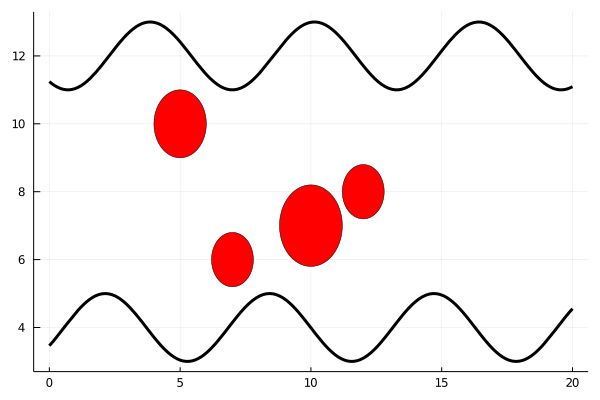

In [88]:
gr()

draw_road(road,0,20)

In [5]:
circle = Circle(1,Point(5,10))
test_curve = BezierCurve([Point(2,9),Point(6,11)])
test_curve = BezierCurve([Point(0, 10), Point(9.792786584297819, 12.404595735445575), Point(19, 9)])

3-element Array{Point,1}:
 Point(0, 10)
 Point(9.792786584297819, 12.404595735445575)
 Point(19, 9)

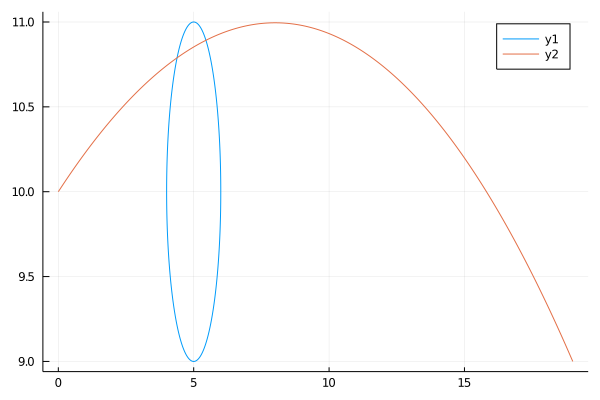

In [6]:
plt = plot(get_circle(circle))
plot!(plt,get_curve(test_curve))

In [7]:
curve_values = get_curve(test_curve)
i = findall(x -> x==4,curve_values[1])
@show i
curve_values[2][i]

i = Int64[]


Any[]

In [8]:
circle_values = get_circle(circle)
is = findall(x -> round(x,digits=2) == 4.00,circle_values[1])
# filter(x -> x<4.1,circle_values[1])

16-element Array{Int64,1}:
 243
 244
 245
 246
 247
 248
 249
 250
 251
 252
 253
 254
 255
 256
 257
 258

In [9]:
circ_intersects = []
for i in is
    if round(circle_values[2][i],digits=1) == curve_values[2][251]
        append!(circ_intersects,[i])
    end
end
circ_intersects

Any[]

In [10]:
intersects = []
for i in 1:length(curve_values[1])
    x = curve_values[1][i]
    y = curve_values[2][i]
    potential_intersect_circle_is = findall(cx -> round(cx,digits=1)==round(x,digits=1),circle_values[1])
    for j in potential_intersect_circle_is
        if round(y,digits=1) == round(circle_values[2][j],digits=1)
            append!(intersects,[(x,y)])
        end
    end
end
@show intersects

infeasbile_d = √((intersects[1][1]-intersects[end][1])^2 + (intersects[1][2] - intersects[end][2])^2)


intersects = Any[(4.280484355731011, 10.776857256404922), (4.280484355731011, 10.776857256404922), (4.319137855387164, 10.781340314086437), (4.319137855387164, 10.781340314086437), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.43507024684353, 10.794510645940377), (4.43507024684353, 10.794510645940377), (

1.2404460658997665

In [142]:
include("GA.jl")
include("roadNetwork.jl")
include("plottingUtils.jl")
P = GA(start_point,goal_point,road,2);

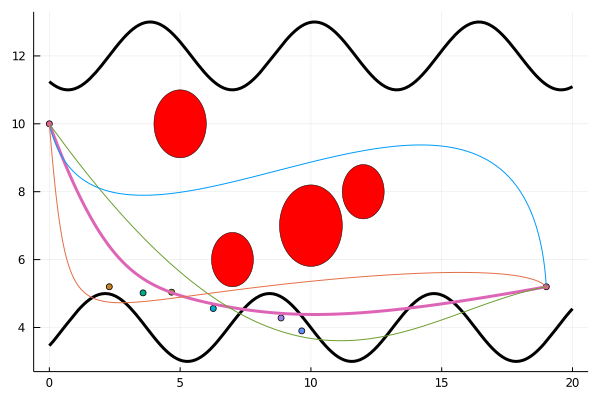

In [136]:
plotGeneration!(draw_road(road,0,20),P[1:4],road)

# map(i->isFeasible(road,i),P)

In [145]:
map(i -> feasibilityCheck(road,i),P)
# feasibilityCheck(road,P[1])

10-element Array{Bool,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [14]:
plt = plotGeneration(P)
o_vals = map(o -> get_circle(o), road.obstacles)


LoadError: MethodError: no method matching plotGeneration(::Nothing)
Closest candidates are:
  plotGeneration(!Matched::Array{Individual,N} where N) at /home/sam/git-clones/Y4-Diss/code/classical/julia/plottingUtils.jl:17
  plotGeneration(!Matched::Array{Individual,N} where N, !Matched::Any) at /home/sam/git-clones/Y4-Diss/code/classical/julia/plottingUtils.jl:17

In [15]:
function plotObstacles(road)
    plt = plot()
    for o in road.obstacles
        plot!(plt,get_circle(o), seriestype=[:shape],legend=false )
    end
    plt
end

plotObstacles (generic function with 1 method)

In [17]:
include("plottingUtils.jl")
plt =plotObstacles(road)
plotGeneration!(plt,P)

LoadError: MethodError: no method matching plotGeneration!(::Plots.Plot{Plots.GRBackend}, ::Nothing)
Closest candidates are:
  plotGeneration!(::Any, !Matched::Array{Individual,N} where N) at /home/sam/git-clones/Y4-Diss/code/classical/julia/plottingUtils.jl:40
  plotGeneration!(::Any, !Matched::Array{Individual,N} where N, !Matched::Road) at /home/sam/git-clones/Y4-Diss/code/classical/julia/plottingUtils.jl:25
  plotGeneration!(::Any, !Matched::Array{Individual,N} where N, !Matched::Road, !Matched::Any) at /home/sam/git-clones/Y4-Diss/code/classical/julia/plottingUtils.jl:25
  ...